1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [74]:
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y analisis de datos
import seaborn as sns # creacion de graficas estadisticas
import matplotlib.pyplot as plt # creacion grafica en dos dimenciones

# librerias para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.linear_model import LinearRegression # libreria para regresion lineal
from sklearn.metrics import classification_report, confusion_matrix

#lectura de datos en python y lo cargamos en la variable datos
Datos = pd.read_csv('./Car_details_v3.csv')

# realizamos lectura de los datos para analisis exploratorio de los datos
Datos.head(20)

,nombre,ano,precio_de_venta,km_recorridos,combustible,tipo_vendedor,trasmision,dueno,kilometraje,motor,poder_maximo,torque,asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,"Maruti Wagon R LXI DUO BSIII,2007,96000,175000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [90]:
#descripcion de los datos maximo minimo el promedio ....
Datos.describe()

,ano,precio_de_venta,km_recorridos,asientos
count,7565.000000,7.565000e+03,7.565000e+03,7565.000000
mean,2014.249570,6.693004e+05,6.770588e+04,5.421943
std,3.698028,8.250085e+05,5.687155e+04,0.954765
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.900000e+05,3.180000e+04,5.000000
50%,2015.000000,4.750000e+05,6.000000e+04,5.000000
75%,2017.000000,7.000000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

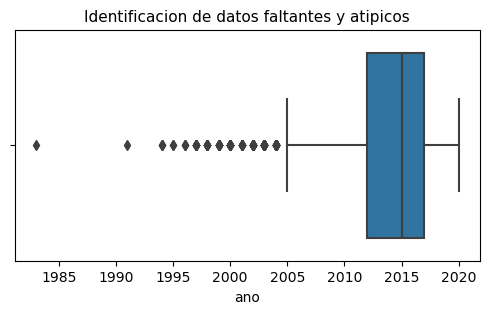

In [76]:
# identificacion de datos faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ano'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=11)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

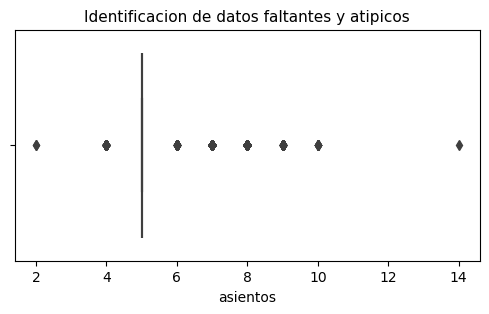

In [77]:
# identificacion de datos faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['asientos'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=11)

2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.

In [87]:
print("Cantidad de registros con NaN en nombre: ", Datos['nombre'].isna().sum())
print("Cantidad de registros con NaN en año: ", Datos['ano'].isna().sum())
print("Cantidad de registros con NaN en precio de venta: ", Datos['precio_de_venta'].isna().sum())
print("Cantidad de registros con NaN en km recorridos: ", Datos['km_recorridos'].isna().sum())
print("Cantidad de registros con NaN en combustible: ", Datos['combustible'].isna().sum())
print("Cantidad de registros con NaN en tipo vendedor: ", Datos['tipo_vendedor'].isna().sum())
print("Cantidad de registros con NaN en tipo trasmision: ", Datos['trasmision'].isna().sum())
print("Cantidad de registros con NaN en tipo dueno: ", Datos['dueno'].isna().sum())
print("Cantidad de registros con NaN en tipo kilometraje: ", Datos['kilometraje'].isna().sum())
print("Cantidad de registros con NaN en tipo motor: ", Datos['motor'].isna().sum())
print("Cantidad de registros con NaN en tipo poder_maximo: ", Datos['poder_maximo'].isna().sum())
print("Cantidad de registros con NaN en tipo torque: ", Datos['torque'].isna().sum())
print("Cantidad de registros con NaN en asientos: ", Datos['asientos'].isna().sum())

Cantidad de registros con NaN en nombre:  0
Cantidad de registros con NaN en año:  0
Cantidad de registros con NaN en precio de venta:  0
Cantidad de registros con NaN en km recorridos:  0
Cantidad de registros con NaN en combustible:  0
Cantidad de registros con NaN en tipo vendedor:  0
Cantidad de registros con NaN en tipo trasmision:  0
Cantidad de registros con NaN en tipo dueno:  0
Cantidad de registros con NaN en tipo kilometraje:  0
Cantidad de registros con NaN en tipo motor:  0
Cantidad de registros con NaN en tipo poder_maximo:  0
Cantidad de registros con NaN en tipo torque:  0
Cantidad de registros con NaN en asientos:  0


In [44]:
#reemplazar todos los ceros con el valor medio (promedio) de la columna
Datos['ano'] = Datos['ano'].fillna(Datos['ano'].mean())
Datos['precio_de_venta'] = Datos['precio_de_venta'].fillna(Datos['precio_de_venta'].mean())
Datos['km_recorridos'] = Datos['km_recorridos'].fillna(Datos['km_recorridos'].mean())
Datos['asientos'] = Datos['asientos'].fillna(Datos['asientos'].mean())

In [89]:
#revision de nuevos valores faltantes
print("Cantidad de registros con NaN en año: ", Datos['ano'].isna().sum())
print("Cantidad de registros con NaN en precio de venta: ", Datos['precio_de_venta'].isna().sum())
print("Cantidad de registros con NaN en km recorridos: ", Datos['km_recorridos'].isna().sum())
print("Cantidad de registros con NaN en asientos: ", Datos['asientos'].isna().sum())

Cantidad de registros con NaN en año:  0
Cantidad de registros con NaN en precio de venta:  0
Cantidad de registros con NaN en km recorridos:  0
Cantidad de registros con NaN en asientos:  0


Text(0.5, 1.0, 'Identificacion de datos atipicos')

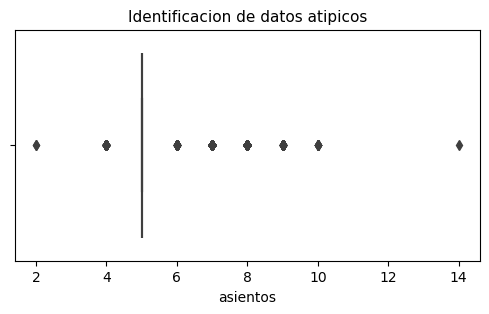

In [92]:
#identificacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['asientos'])
plt.title('Identificacion de datos atipicos', fontsize=11)

In [93]:
nivel_minimo=4
nivel_maximo=7
total_Atipicos=((Datos['asientos']<nivel_minimo)|(Datos['asientos']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 316


In [94]:
#filtrar datos atipicos, es decir que solo me deje los que estan entre 4 y 7
Datos=Datos[(Datos['asientos']<nivel_maximo)&(Datos['asientos']>nivel_minimo)]

In [95]:
# comprovar que se hayan removido los datos atipicos
total_Atipicos=((Datos['asientos']<nivel_minimo)|(Datos['asientos']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 0


In [96]:
#revision de tipo de datos y de datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           6006 non-null   object 
 1   ano              6006 non-null   float64
 2   precio_de_venta  6006 non-null   float64
 3   km_recorridos    6006 non-null   float64
 4   combustible      6006 non-null   object 
 5   tipo_vendedor    6006 non-null   object 
 6   trasmision       6006 non-null   object 
 7   dueno            6006 non-null   object 
 8   kilometraje      6006 non-null   object 
 9   motor            6006 non-null   object 
 10  poder_maximo     6006 non-null   object 
 11  torque           6006 non-null   object 
 12  asientos         6006 non-null   float64
dtypes: float64(4), object(9)
memory usage: 656.9+ KB


3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de característica

la variable objetivo es el precio de venta

In [98]:
#total de personas con enfermedad cardiaca
Datos['precio_de_venta'].value_counts()

precio_de_venta
300000.0     176
350000.0     173
550000.0     164
600000.0     155
450000.0     154
            ... 
1145000.0      1
531000.0       1
168000.0       1
1515000.0      1
746000.0       1
Name: count, Length: 557, dtype: int64

In [55]:
Datos[['precio_de_venta']].head(30)

,precio_de_venta
0,450000.000000
1,370000.000000
2,656697.467317
3,225000.000000
4,656697.467317
5,440000.000000
6,656697.467317
8,350000.000000
9,200000.000000
10,500000.000000


4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.

In [106]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y variable objetivo (Y)
X = Datos.drop('precio_de_venta', axis=1)
Y = Datos['precio_de_venta']

# Dividir los datos en conjuntos de entrenamiento y prueba sin estratificación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [107]:
print(X_train)

                                     nombre     ano  km_recorridos  \
328                          Maruti Zen LXI  2003.0        60000.0   
1518                  Maruti Swift DDiS LDI  2017.0        35000.0   
5701                      Hyundai i10 Magna  2011.0        40000.0   
3754  Ford Fiesta Classic 1.4 Duratorq CLXI  2012.0        60000.0   
3266                 Hyundai i20 1.4 Sportz  2018.0        35000.0   
...                                     ...     ...            ...   
6679                   Honda Civic 1.8 S MT  2006.0        70000.0   
4421                Maruti Baleno Alpha 1.3  2018.0        38817.0   
2246              Chevrolet Sail 1.2 LS ABS  2015.0        50000.0   
3535             Tata Zest Quadrajet 1.3 XM  2015.0       100000.0   
3724                   Hyundai Verna 1.6 SX  2013.0        88000.0   

     combustible tipo_vendedor trasmision                 dueno kilometraje  \
328       Petrol    Individual     Manual  Fourth & Above Owner   17.3 kmpl   
1

In [108]:
print (Y_train)

328      65000.0
1518    500000.0
5701    215000.0
3754    330000.0
3266    780000.0
          ...   
6679    121000.0
4421    740000.0
2246    350000.0
3535    400000.0
3724    520000.0
Name: precio_de_venta, Length: 4504, dtype: float64


5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [114]:
# Codificar características categóricas usando One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Alinear las columnas en los conjuntos de entrenamiento y prueba
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Entrenar el modelo
modelo_regresion.fit(X_train_aligned, Y_train)

# Crear la predicción
Prediccion = modelo_regresion.predict(X_test_aligned)




In [115]:
print (Y_test)

5887     330000.0
1847     550000.0
5131     500000.0
608      350000.0
1858    5150000.0
          ...    
6298    1050000.0
3080    3200000.0
4284     350000.0
7376     750000.0
3863     190000.0
Name: precio_de_venta, Length: 1502, dtype: float64


In [116]:
print (Prediccion)

[300000. 650000. 300000. ... 300000. 300000. 300000.]


6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular las métricas
accuracy = accuracy_score(Y_test, Prediccion)
precision = precision_score(Y_test, Prediccion, average='weighted')
recall = recall_score(Y_test, Prediccion, average='weighted')
f1 = f1_score(Y_test, Prediccion, average='weighted')

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.04460719041278296
Precision: 0.01694050511929107
Recall: 0.04460719041278296
F1-score: 0.019773094654519832


C:\Users\javie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\javie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo.

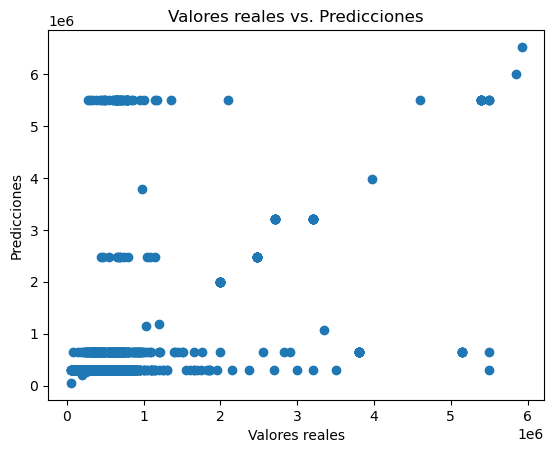

In [124]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

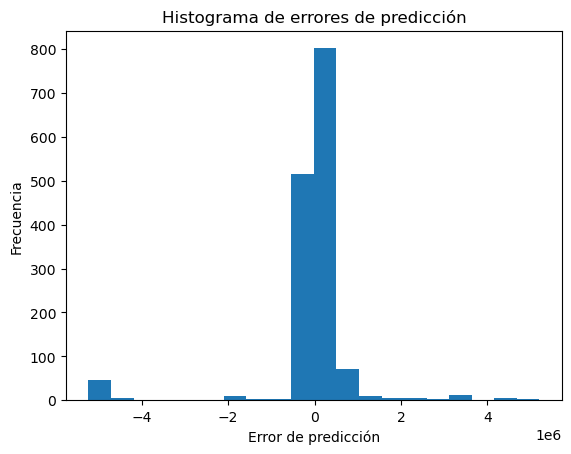

In [125]:
import matplotlib.pyplot as plt

errores = Y_test - Prediccion
plt.hist(errores, bins=20)
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.title("Histograma de errores de predicción")
plt.show()